In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string, sys,os
# sys.path += ['../'] 
import pandas as pd

import config
import data
import process
from data import *
%matplotlib inline

## Dataset Exploration

### 1.  Loading data

Finished restore data ...


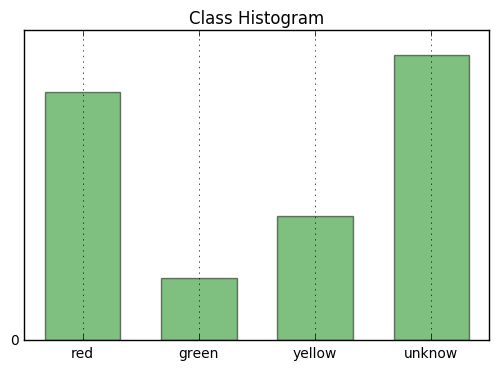

In [4]:
dataset = DataSet()
# path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)) + os.sep +'data' + os.sep + 'data.csv'
# path = os.path.pardir + os.sep +'data' + os.sep + 'data.csv'
# path = str(os.path.pardir) + '/data/data.csv'
# dataset.load_data(path)
# dataset.save()

# print(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)))
path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)) + os.sep +'output'
dataset.restore(path)
dataset.display_hist_classes()

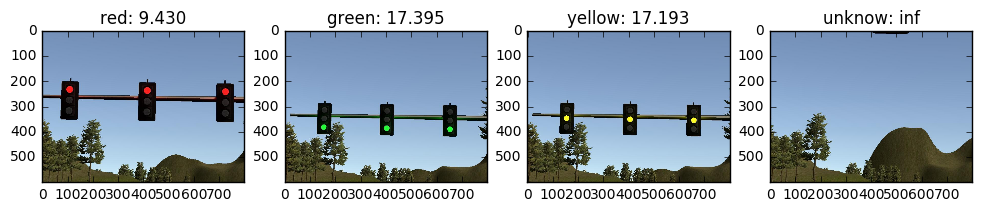

In [5]:
image_r, dist_r =  dataset.data['red'][1]
image_g, dist_g =  dataset.data['green'][0]
image_y, dist_y =  dataset.data['yellow'][0]
image_u, dist_u =  dataset.data['unknow'][0]

dist_r =float(dist_r)
dist_g =float(dist_g)
dist_y =float(dist_y)

images = [image_r,image_g,image_y,image_u] 
labels = ['red: ' + format(dist_r, '0.3f'),'green: '+  format(dist_g, '0.3f') ,'yellow: '+  format(dist_y, '0.3f'),'unknow: '+dist_u]

plt.rcParams['figure.figsize'] = (12, 6)
process.plot_images(images,labels)
plt.show()


### 2.  Thresholding

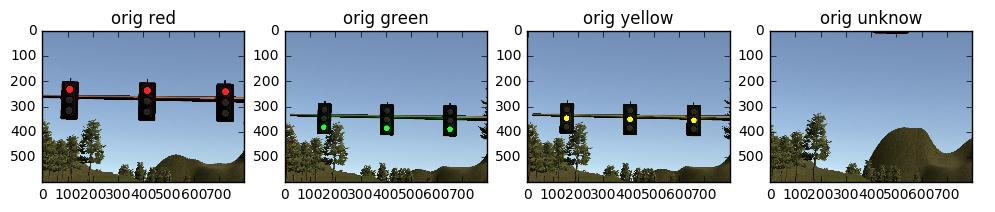

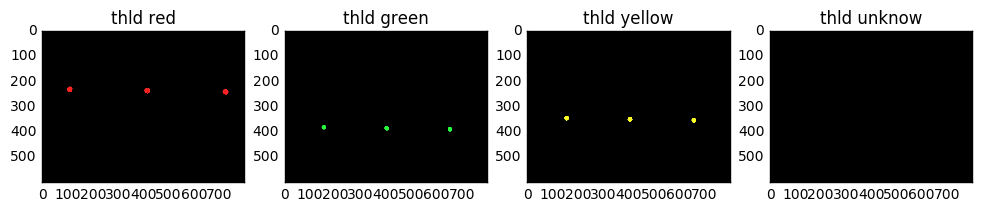

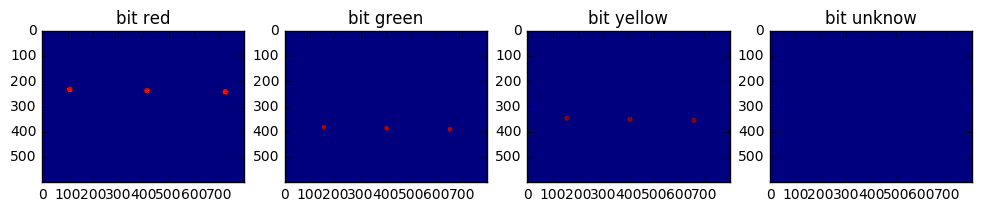

In [6]:
from collections import defaultdict

import cv2 
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def get_thresholds(image, rgb_threshold):
    
    threshold = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
    return threshold 
    
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#1. Grab the x and y size
height = image_r.shape[0]
width = image_r.shape[1]

#2. Define a kernel size and apply Gaussian smoothing
kernel_size = 3
blur_r = gaussian_blur(np.copy(image_r), kernel_size)
blur_g = gaussian_blur(np.copy(image_g), kernel_size)
blur_y = gaussian_blur(np.copy(image_y), kernel_size)
blur_u = gaussian_blur(np.copy(image_u), kernel_size)

color_select  = defaultdict(list)

# Filter the image to get only red
red_threshold, green_threshold, blue_threshold = 240, 0, 0
rgb_threshold_r = [red_threshold, green_threshold, blue_threshold]

color_select['red'] = blur_r 
thresholds = get_thresholds(color_select['red'], rgb_threshold_r)
color_select['red'][thresholds] = [0,0,0]

# Filter the image to get only green
red_threshold, green_threshold, blue_threshold = 0, 240, 0
rgb_threshold_g = [red_threshold, green_threshold, blue_threshold]

color_select['green'] = blur_g 
thresholds = get_thresholds(color_select['green'], rgb_threshold_g)        
color_select['green'][thresholds] = [0,0,0]

# Filter the image to get only yellow
red_threshold, green_threshold, blue_threshold = 240, 240, 0
rgb_threshold_y = [red_threshold, green_threshold, blue_threshold]

color_select['yellow'] = blur_y 
thresholds = get_thresholds(color_select['yellow'], rgb_threshold_y)        
color_select['yellow'][thresholds] = [0,0,0]

# Filter the image with both red, green and yellow filter
color_select['unknow'] = blur_u 
thresholds_r = get_thresholds(color_select['unknow'], rgb_threshold_r)
thresholds_g = get_thresholds(color_select['unknow'], rgb_threshold_g)
thresholds_y = get_thresholds(color_select['unknow'], rgb_threshold_y)

color_select['unknow'][thresholds_r] = [0,0,0]
color_select['unknow'][thresholds_g] = [0,0,0]
color_select['unknow'][thresholds_y] = [0,0,0]
        
# #3. Convert RGB to HSV
hsv_r = cv2.cvtColor(color_select['red'], cv2.COLOR_RGB2HSV)
hsv_g = cv2.cvtColor(color_select['green'], cv2.COLOR_RGB2HSV)
hsv_y = cv2.cvtColor(color_select['yellow'], cv2.COLOR_RGB2HSV)
hsv_u = cv2.cvtColor(color_select['unknow'], cv2.COLOR_RGB2HSV)

#5. Bitwise-OR the yellow and white images
gray_r = grayscale(color_select['red'])
gray_g = grayscale(color_select['green'])
gray_y = grayscale(color_select['yellow'])
gray_u = grayscale(color_select['unknow'])

plt.rcParams['figure.figsize'] = (12, 6)

images = [image_r,image_g,image_y,image_u] 
labels = ['orig red','orig green','orig yellow', 'orig unknow']
process.plot_images(images,labels)
plt.show()

images = [color_select['red'],color_select['green'],color_select['yellow'],color_select['unknow']] 
labels = ['thld red','thld green','thld yellow','thld unknow', 'bit red','bit green','bit yellow', 'bit unknow']
process.plot_images(images,labels)
plt.show()

images = [gray_r,gray_g,gray_y,gray_u] 
labels = ['bit red','bit green','bit yellow', 'bit unknow']
process.plot_images(images,labels)
plt.show()

### 3.  Distance

In [7]:
# path = os.path.abspath('..')+'/output'+'/light1_lane1' 
path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)) + os.sep +'data'

log = pd.read_csv(path+'/data.csv')
log.columns = ['filename','distance']
pd.set_option('display.width', 120)
pd.set_option('max_rows', 500)
print(log)

                           filename   distance
0       red/1504352290548373979.jpg   9.430476
1       red/1504352290644768748.jpg   8.899540
2       red/1504352290735002785.jpg   8.375595
3       red/1504352290832544393.jpg   7.850594
4       red/1504352290941731923.jpg   7.334722
5       red/1504352291038548208.jpg   6.819797
6       red/1504352291141472176.jpg   6.312940
7       red/1504352291244161933.jpg   5.810102
8       red/1504352291343671439.jpg   5.312347
9       red/1504352291448728075.jpg   4.819681
10      red/1504352291553694133.jpg   4.332057
11      red/1504352291645430582.jpg   3.753223
12      red/1504352291735453416.jpg   3.371077
13      red/1504352291845640016.jpg   2.898795
14      red/1504352291925028229.jpg   2.430766
15      red/1504352292029097514.jpg   1.968102
16      red/1504352292128793515.jpg   1.510132
17      red/1504352292233012178.jpg   1.058702
18      red/1504352292349687016.jpg   0.616169
19      red/1504352292449496231.jpg   0.214981
20      red/1

In [ ]:
# df = pd.DataFrame(log[log['traffic light'] == 7])
# df = df[ (df['state'] < 4) & (df['distance'] > 190)]
# df = df[ (df['state'] < 4) ]
# df = df[ (df['state'] < 4) & (df['distance'].isin([192.553529, 172.441654, 150.769767,
#                                                    129.335998, 99.921481, 79.074018,
#                                                    59.663820, 30.669162, 10.959246]))]

# df = df[ (df['state'] < 4) & (df['distance'] in [192.553529])]
# pd.set_option('max_rows', 500)
# print(df)



In [ ]:
# data = {
# 'image': [
# 'camera/green/1504538982742240470.jpg',
# 'camera/green/1504538983649384727.jpg',
# 'camera/yellow/1504538984646697632.jpg',
# 'camera/yellow/1504538985742756316.jpg',
# 'camera/red/1504538987455157500.jpg',
# 'camera/red/1504538988845844676.jpg',
# 'camera/red/1504538990245185555.jpg',
# 'camera/red/1504538993857003348.jpg',
# 'camera/red/1504539004748976870.jpg'],
# 'distance':[192.553529, 172.441654, 150.769767,129.335998, 99.921481, 79.074018, 59.663820, 30.669162, 10.959246] 
# }

# frame = pd.DataFrame(data)

In [ ]:
# image0 = load_image(frame['image'][0]) 
# image1 = load_image(frame['image'][1]) 
# image2 = load_image(frame['image'][2]) 

# images = [image0,image1,image2] 
# labels = [frame['distance'][0],frame['distance'][1],frame['distance'][2]]
# plt.rcParams['figure.figsize'] = (12, 6)
# process.plot_images(images,labels)
# plt.show()

# image3 = load_image(frame['image'][3]) 
# image4 = load_image(frame['image'][4]) 
# image5 = load_image(frame['image'][5]) 

# images = [image3,image4,image5] 
# labels = [frame['distance'][3],frame['distance'][4],frame['distance'][5]]
# plt.rcParams['figure.figsize'] = (12, 6)
# process.plot_images(images,labels)
# plt.show()

# image6 = load_image(frame['image'][6]) 
# image7 = load_image(frame['image'][7]) 
# image8 = load_image(frame['image'][8]) 

# images = [image6,image7,image8] 
# labels = [frame['distance'][6],frame['distance'][7],frame['distance'][8]]
# plt.rcParams['figure.figsize'] = (12, 6)
# process.plot_images(images,labels)
# plt.show()